# Métodos Computacionales


## Unidad 2: 

### Interpolación

- Interpolación Lineal 
- Interpolación de Lagrange
- Interpolación de Newton
- Interpolacón de Hermite


## Introducción.

Debido a la naturaleza discreta (y a veces escasa) de los experimentos y observaciones, los procedimientos de toma de datos siempre producirán datos discretos. Incluso, como hemos visto antes, la información solo puede presentarse discretamente en una computadora debido a la representación binaria. Sin embargo, cuando se trata de modelos físicos, se prefieren las propiedades continuas y suaves. Las técnicas de interpolación permiten recuperar un campo continuo (valores intermedios) a partir de conjuntos de datos dispersos. A lo largo de esta sección cubriremos algunos de estos métodos de interpolación por medio de polinomios algebraicos.

Los polinomios algebraicos son funciones muy especiales ya que tienen propiedades como la diferenciabilidad (a diferencia de la interpolación lineal) y la continuidad que los hacen útiles para aproximaciones como la interpolación. Un polinomio se define como una función dada por la expresión general:

$$ P_n (x) = a_nx ^ n + a_ {n-1} x ^ {n-1} + \cdots + a_1 x + a_0 $$
donde $ n $ es el grado polinómico.

Otra propiedad importante de los polinomios está dada por el [Weierstrass Approximation Theorem](http://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem), que establece una función común $ f $ definida en un intervalo $ [a, b] $, para todos $ \epsilon> 0 $, existe un polinomio $ P (x) $ tal que

$$ | f (x) - P (x) | <\epsilon \ \ \ \ \ \mbox {para todos} \ x \ \mbox {in} \ [a, b]. $$

Este teorema garantiza la existencia de tal polinomio, sin embargo, es necesario proponer un esquema para construirlo.



## Interpolación linear

Cuando tenemos un conjunto de puntos discretos de la forma $ (x_i, y_i) $ con $ 1 \leq i \leq N $, la forma más natural de obtener (aproximada) cualquier valor intermedio es asumiendo puntos conectados por líneas. Supongamos un conjunto de puntos $ (x_i, y_i) $ tal que $ y_i = f (x_i) $ para una función desconocida $ f (x) $, si queremos aproximar el valor $ f (x) $ para $ x_i \leq x \leq x_ {i + 1} $, construimos una ecuación de una línea que pasa por $ (x_i, y_i) $ y $ (x_ {i + 1}, y_ {i + 1}) $, produciendo:

$$\frac{y-y_i}{x-x_i} = \frac{y_{i+1}-y_i}{x_{i+1}-x_i} \ \ \longrightarrow  f(x)\approx y = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) + y_i $$

y esto se puede aplicar para cualquier $ x $ tal que $ x_0 \leq x \leq x_N $ y donde se ha asumido un conjunto ordenado $ \left \{x_i \right \} _ i $.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Linear Interpolating Function
def LinearInterpolator( x, Xn, Yn ):
    
    #Sorting data, in case they are not
    Yn = Yn[np.argsort(Xn)]
    Xn = Xn[np.argsort(Xn)]
    
    #Detecting size of x
    try:
        Ninter = len(x)
    except:
        Ninter = 1
        x = np.array([x,])
        
    #Constructing function for each iteration
    term = lambda x, i: (Yn[i+1] - Yn[i])/(Xn[i+1] - Xn[i])*(x - Xn[i]) + Yn[i]
    
    #Detecting intervals for each x, [x_i, x_i+1] and interpolating
    y = []
    for n in range(Ninter):
        for i in range(len(Xn)):
            if (x[n] <= Xn[i]):
                break
        y.append(term(x[n],i-1))
    return np.array(y)

Text(0.5, 1.0, 'Linear interpolation of $\\sin(x)$')

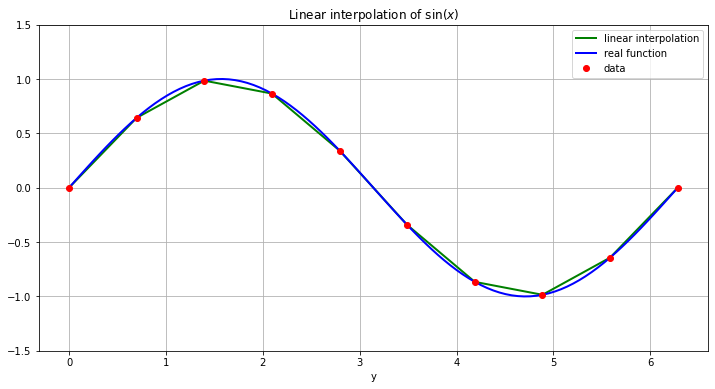

In [29]:
#Function

Ninter=10

def function(x):
    return np.sin(x)

#Number of intervals for data
Ndat = 10
Xn = np.linspace( 0, 2*np.pi, Ndat )
Yn = function(Xn)

#Obtaining linear interpolation
Ninter = 100
x = np.linspace( 0, 2*np.pi, Ninter)
y = LinearInterpolator( x, Xn, Yn )
f = function(x)

#Plotting
plt.figure( figsize=(12,6) )
plt.plot( x, y, color="green", linewidth=2, label="linear interpolation" )
plt.plot( x, f, color="blue", linewidth=2, label="real function" )
plt.plot( Xn, Yn, "o", color="red", label="data" )

#Formatting
plt.legend()
plt.grid()
plt.xlabel( "x" )
plt.xlabel( "y" )
plt.ylim( (-1.5,1.5) )
plt.title( "Linear interpolation of $\sin(x)$" )

### Steps LI
Una vez definida la base matemática detrás de la interpolación lineal, procedemos a establecer los pasos algorítmicos para una implementación.

1. Establezca el conjunto de datos que desea interpolar, es decir, debe proporcionar un conjunto de la forma $ (x_i, y_i) $.
2. Dé el valor $ x $ donde desee aproximar el valor $ f (x) $.
3. Encuentre el intervalo $ [x_i, x_ {i + 1}] $ en el que $ x $ está incrustado.
4. Utilice la expresión anterior para encontrar $ y = f (x) $.

## Interpolación de Lagrange

La **interpolación polinomial de Lagrange** encuentra un único polinomio que pasa por todos los puntos de datos. Este polinomio se conoce como **polinomio de Lagrange**, $ L (x) $, y como función de interpolación, debe tener la propiedad $ L (x_i) = y_i $ para cada punto del conjunto de datos. Para calcular polinomios de Lagrange, es útil escribirlos como una combinación lineal de **polinomios de base de Lagrange**, $ P_i (x) $, donde
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

and
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Aquí, $ \prod $ significa "el producto de" o "multiplicar".

Notará que por construcción, $ P_i (x) $ tiene la propiedad de que $ P_i (x_j) = 1 $ cuando $ i = j $ y $ P_i (x_j) = 0 $ cuando $ i \ne j $. Como $ L (x) $ es una suma de estos polinomios, puede observar que $ L (x_i) = y_i $ para cada punto, exactamente como se desee.

**Ejemplo:** Encuentra los polinomios de base de Lagrange para el conjunto de datos *x = [0, 1, 2]* y *y = [1, 3, 2]*. Grafique cada polinomio y verifique la propiedad de que $ P_i (x_j) = 1 $ cuando $ i = j $ y $ P_i (x_j) = 0 $ cuando $ i \ne j $.


\begin{eqnarray*}
P_1(x) &=& \frac{(x - x_2)(x - x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x - 1)(x - 2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2),\\
P_2(x) &=& \frac{(x - x_1)(x - x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x - 0)(x - 2)}{(1-0)(1-2)} = -x^2 + 2x,\\
P_3(x) &=& \frac{(x - x_1)(x - x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x - 0)(x - 1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x).
\end{eqnarray*}

[ 3.00000000e+00  2.75500000e+00  2.52000000e+00  2.29500000e+00
  2.08000000e+00  1.87500000e+00  1.68000000e+00  1.49500000e+00
  1.32000000e+00  1.15500000e+00  1.00000000e+00  8.55000000e-01
  7.20000000e-01  5.95000000e-01  4.80000000e-01  3.75000000e-01
  2.80000000e-01  1.95000000e-01  1.20000000e-01  5.50000000e-02
  2.22044605e-16 -4.50000000e-02 -8.00000000e-02 -1.05000000e-01
 -1.20000000e-01 -1.25000000e-01 -1.20000000e-01 -1.05000000e-01
 -8.00000000e-02 -4.50000000e-02 -4.44089210e-16  5.50000000e-02
  1.20000000e-01  1.95000000e-01  2.80000000e-01  3.75000000e-01
  4.80000000e-01  5.95000000e-01  7.20000000e-01  8.55000000e-01
  1.00000000e+00]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


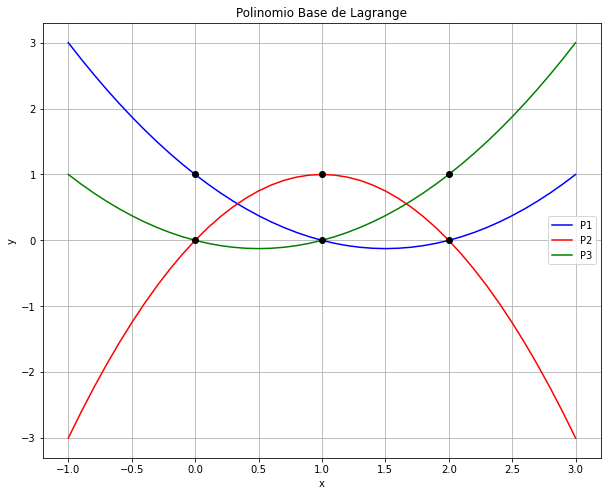

In [6]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# Construye el polinomio de gradi n-1 
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
print(P1(x_new))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
print((P1(x_new)*1)+(P2(x_new)*2)+(P3(x_new)*3))




plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Polinomio Base de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

L = 1*P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Polinomio de Lagrange')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from scipy.interpolate import lagrange

x = [0, 1, 2]
y = [1, 3, 2]

f = lagrange(x, y)

[-4.    -3.365 -2.76  -2.185 -1.64  -1.125 -0.64  -0.185  0.24   0.635
  1.     1.335  1.64   1.915  2.16   2.375  2.56   2.715  2.84   2.935
  3.     3.035  3.04   3.015  2.96   2.875  2.76   2.615  2.44   2.235
  2.     1.735  1.44   1.115  0.76   0.375 -0.04  -0.485 -0.96  -1.465
 -2.   ]


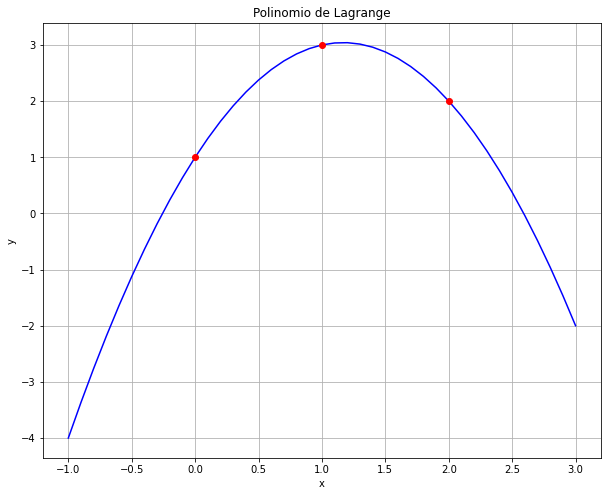

In [4]:
fig = plt.figure(figsize = (10,8))
print(f(x_new))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Polinomio de Lagrange')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Steps LP

Una vez definido el procedimiento formal para la construcción de un polinomio de Lagrange, procedemos a describir el algoritmo explícito:

1. Tome conjunto de datos de trabajo $ (x_i, y_i) $ y establezca cuántos puntos tiene.
2. Defina las funciones $P_ {n, i} (x) $ de forma general.
3. Agregue cada uno de esos términos como se muestra en la última expresión.
4. Evalúe su resultado donde quiera.

## Diferencias divididas

A pesar de la buena precisión lograda por los polinomios de interpolación de Lagrange, la manipulación analítica de tales expresiones es bastante complicada. Además, al aplicar otras técnicas basadas en polinomios como los polinomios de Hermite, los algoritmos presentan formas muy diferentes de lograr la interpolación final, lo que hace que la comparación no sea clara.

Las diferencias divididas son una forma de estandarizar la notación para interpolar polinomios. Suponga un polinomio $ P_n (x) $ y escríbalo en la siguiente forma:

$$ P_n (x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0) (x-x_1) + \cdots + a_n (x-x_0) \cdots (x-x_ {n-1}) $$ 

Que se puede reescribir como:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

La característica especial del polinomio de Newton es que los coeficientes $ a_i $ se pueden determinar mediante un procedimiento matemático muy simple. Por ejemplo, dado que el polinomio pasa por cada punto de datos, por lo tanto, para los puntos de datos $ (x_i, y_i) $, tendremos $ f (x_i) = y_i $, por lo que tenemos

$$f(x_0) = a_0 = y_0$$

y $f(x_1) = a_0 + a_1(x_1-x_0) = y_1$, reorganizándolo para obtener $ a_1 $, tendremos:

$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Ahora, con los puntos $(x_2, y_2)$, se calcula $a_2$, y esto tiene la forma:

$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Hagamos un punto de datos más $ (x_3, y_3) $ para calcular $ a_3 $, después de insertar el punto de datos en la ecuación, obtenemos:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$

Ahora, ¿ves los patrones? Estos se denominan **diferencias divididas**, si definimos:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

Continuamos escribiendo esto, tendremos la siguiente ecuación de iteración:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$

Podemos ver una belleza del método es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambiará los calculados, solo necesitamos calcular las diferencias más altas continúa de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$



Estas expresiones son los ladrillos fundamentales para cualquier método de interpolación.


## Interpolación de Hermite

Por cálculo, sabemos que los polinomios de Taylor expanden una función en un punto específico $ x_i $, siendo ambas funciones (la original y la función de Taylor) exactamente iguales en cualquier orden derivado en ese punto. Además, como se mencionó anteriormente, un polinomio de Lagrange, dado un conjunto de puntos de datos, pasa por todos esos puntos al mismo tiempo. Sin embargo, si esos puntos provienen de una función subyacente desconocida $ f (x) $, el polinomio interpolante podría (seguramente) diferir de la función real en cualquier orden derivado superior. Entonces tenemos:

- **Los polinomios de Taylor** son exactos en cualquier orden, pero eso solo sigue siendo cierto en un punto específico.

- **Los polinomios de Lagrange** pasan por todos los puntos de un conjunto de datos dado, pero solo en orden cero. Los derivados ya no son iguales.

Una vez establecidas estas diferencias, podemos introducir los polinomios de Hermite como una generalización de los polinomios de Taylor y Lagrange.

Al principio, los polinomios de Hermite se pueden aproximar en cualquier orden deseado en todos los puntos, siempre que uno tenga toda esta información. Sin embargo, en aras de la simplicidad y sin pérdida de generalidad, asumiremos polinomios de Hermite iguales a la función real en orden cero y de primera derivada.

Supongamos un conjunto de datos $\{x_i \}_i$ para $ i = 0,1, \cdots, n$ con los valores respectivos $\{f (x_i) \} _ i $ y $ \ {f '(x_i) \ } _i $. Si suponemos que dos polinomios diferentes se ajustan a cada conjunto de datos, es decir, un polinomio para $ \{f (x_i) \}_i $ y otro para $ \{f'(x_i) \}_i $, obtenemos $2n + 2$ coeficientes, sin embargo, los coeficientes de orden cero se pueden juntar para que finalmente haya que determinar los coeficientes independientes de $2n + 1$. En este caso, asignamos el polinimial de Hermite respectivo como $H_ {2n + 1}(x)$.

## Ejemplo

https://drive.google.com/drive/u/1/my-drive

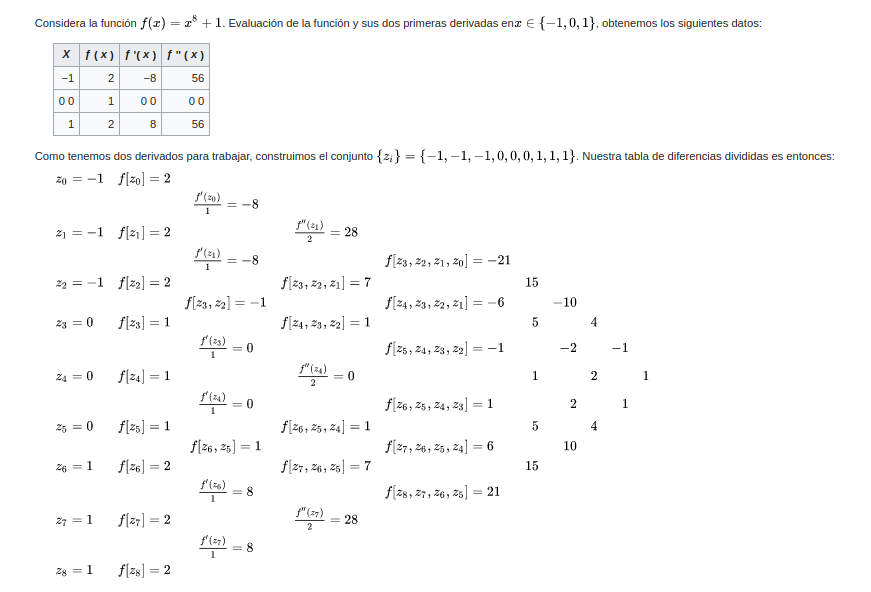

https://drive.google.com/file/d/1Dvci_tap-wUevpW1bnr4NKvXQ-axC9P-/view?usp=sharing

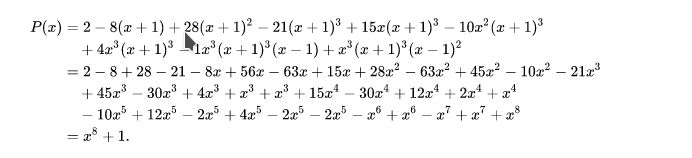